# **Design**

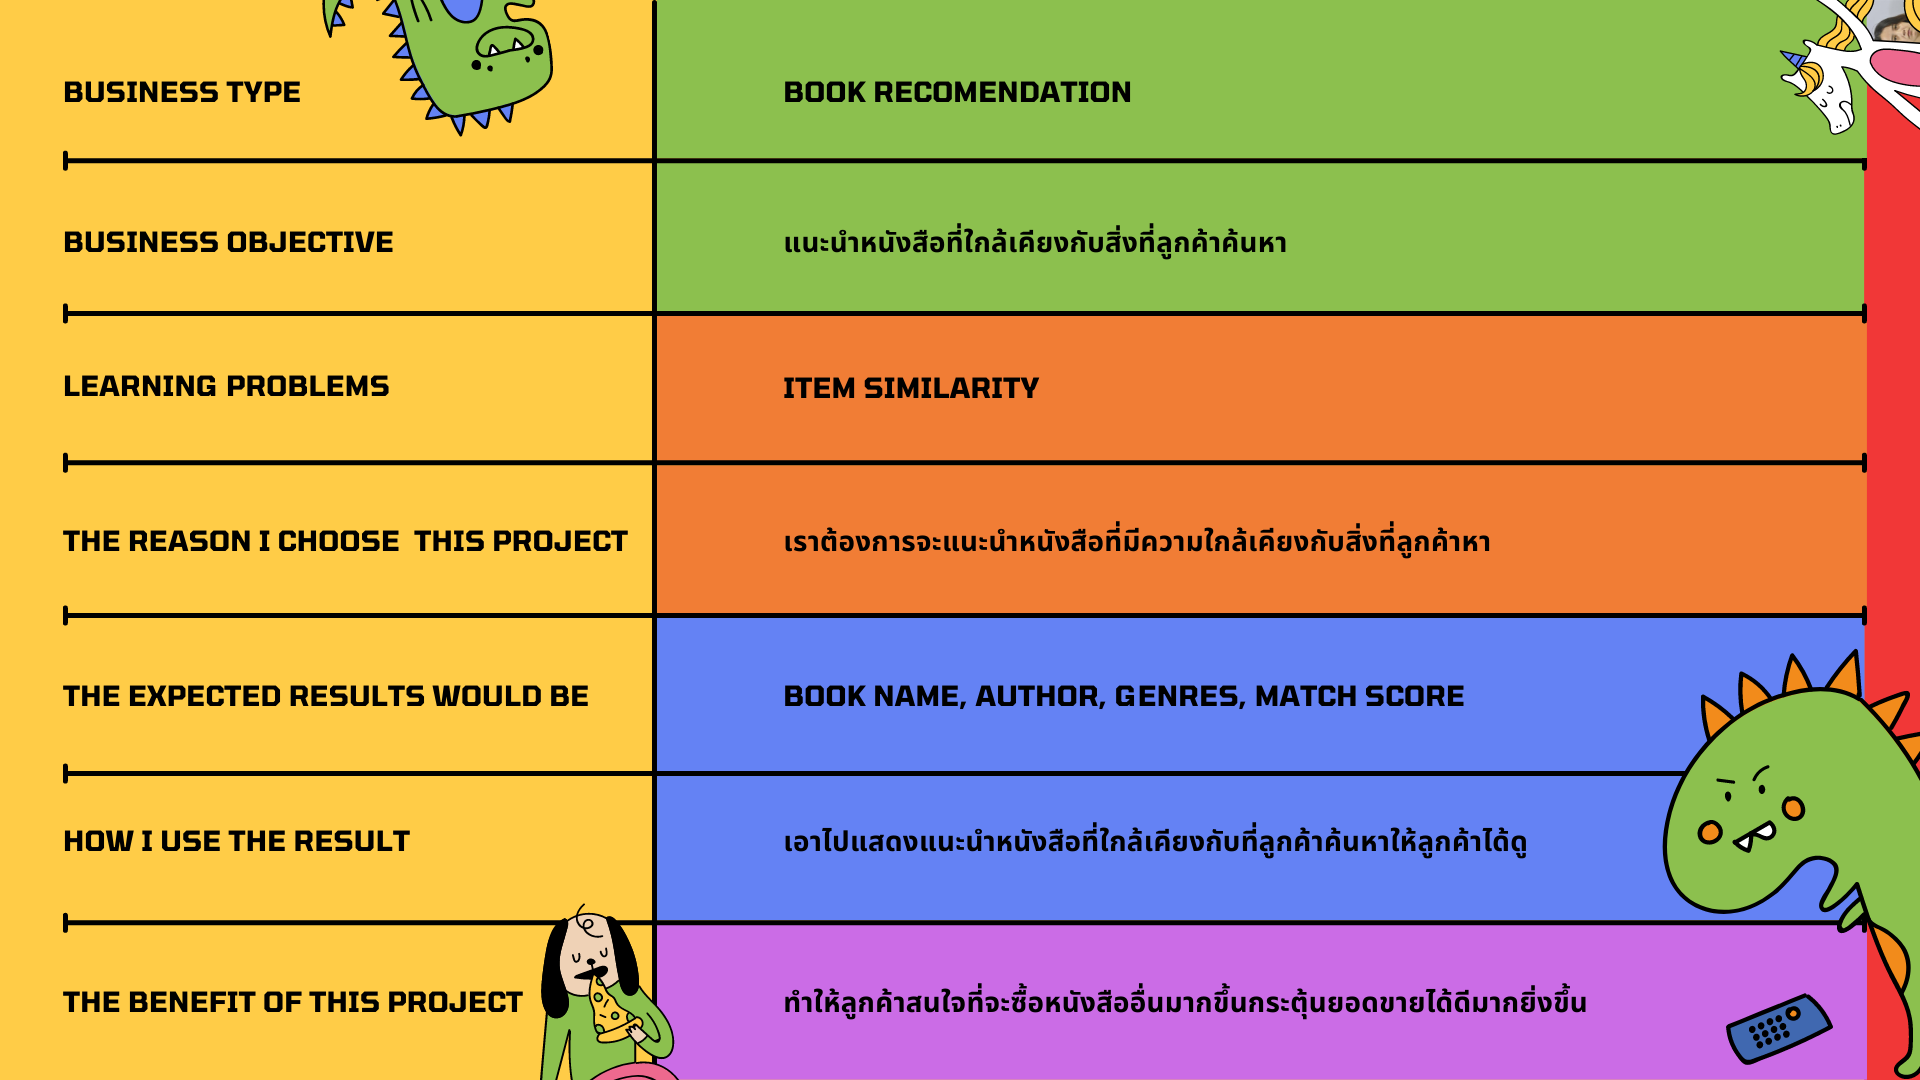

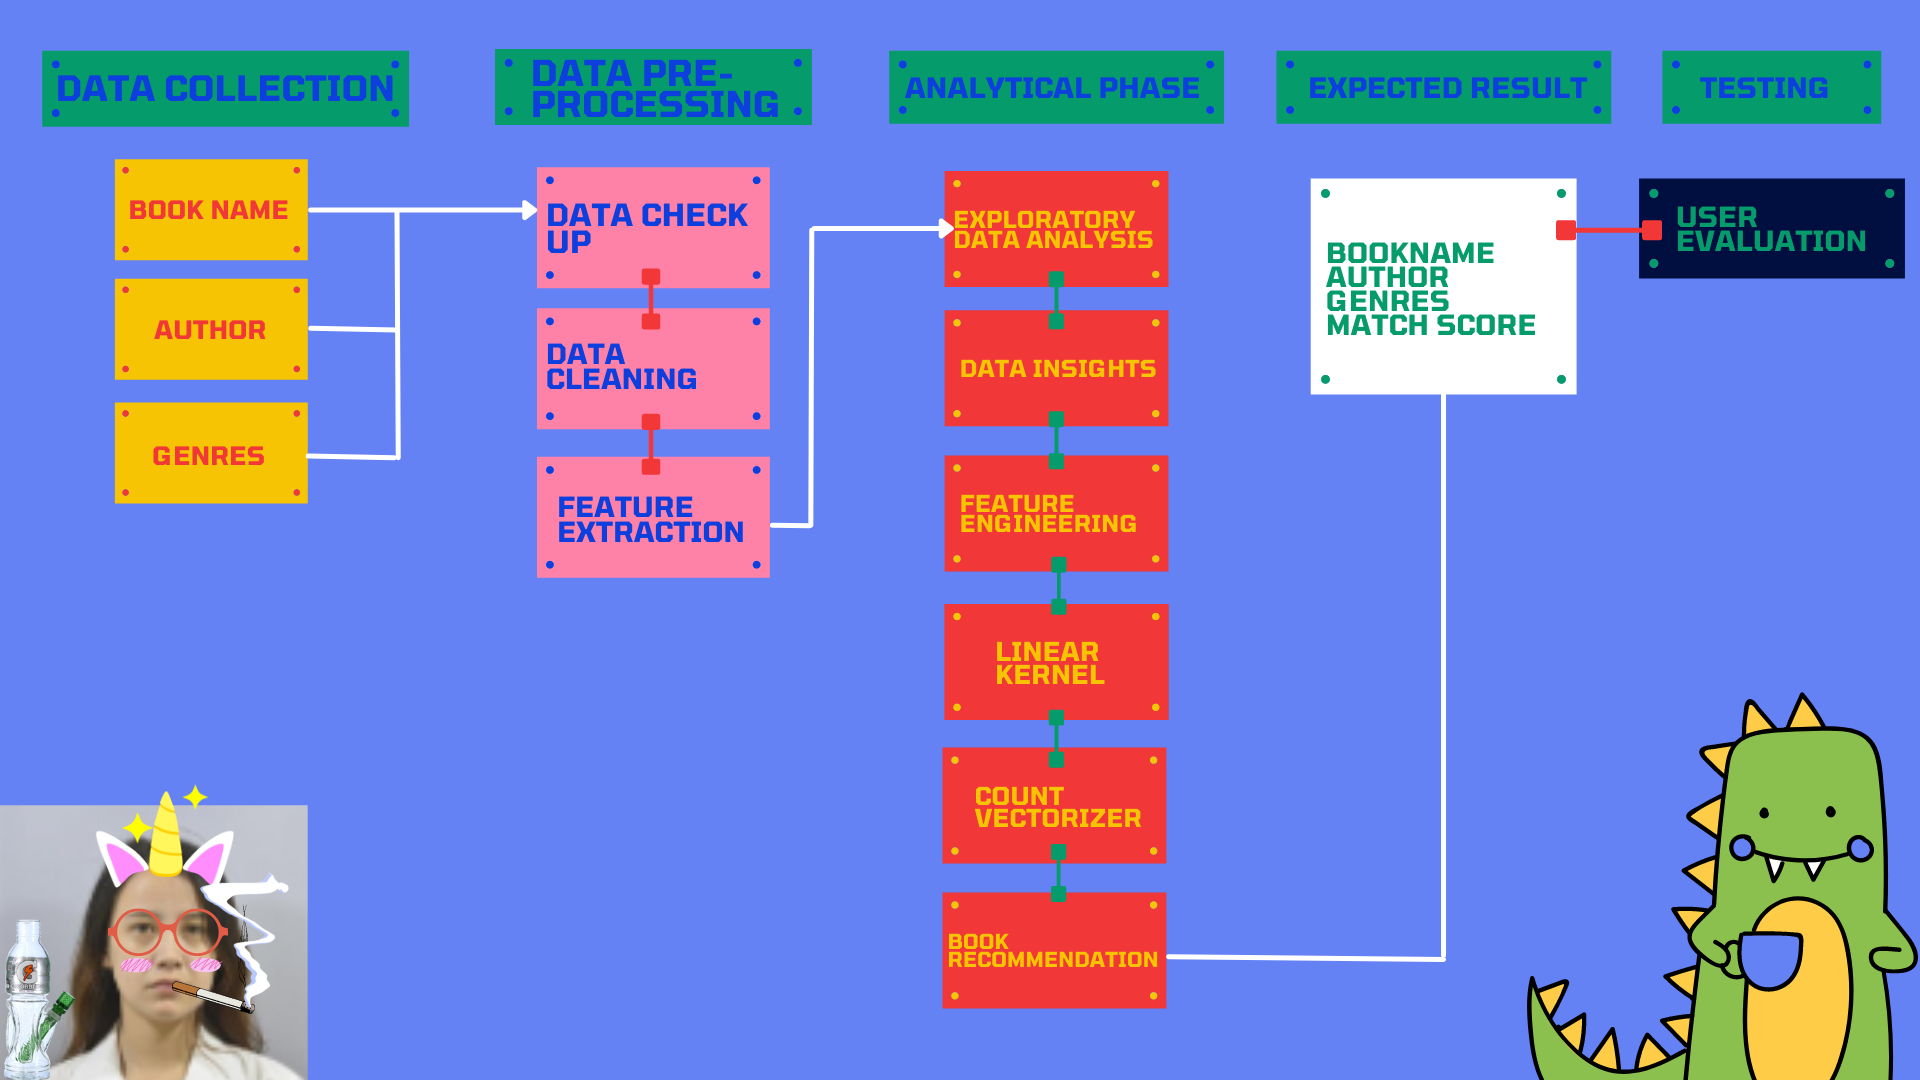

# **Import Libraries**

In [56]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, linear_kernel
import altair as alt
import time




!pip install gradio -q
import gradio as gr

# **Importing Dataset**

In [57]:
book_data = pd.read_csv('https://raw.githubusercontent.com/thekiller201/cs-work/main/bestsellers_with_categories%20-%20bestsellers_with_categories%20(1).csv', encoding="utf-8")
book_data.sample(5)

,Name,Author,User Rating,Reviews,Price,Year,Genre
213,"Lean In: Women, Work, and the Will to Lead",Sheryl Sandberg,4.5,6132,13,2013,Biography
280,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2018,Guide Book
452,The Pout-Pout Fish,Deborah Diesen,4.8,9784,5,2018,Fiction
298,Shred: The Revolutionary Diet: 6 Weeks 4 Inche...,Ian K. Smith M.D.,4.1,2272,6,2013,Health
123,Giraffes Can't Dance,Giles Andreae,4.8,14038,4,2015,Picture Book


# **Data Exploration**

In [58]:
book_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


เช็คข้อมูลว่ามี Null หรือไม่

In [59]:
book_data.isna().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

เช็คว่ามีข้อมูลซำ้หรือไม่

In [60]:
book_data.duplicated().sum()

0

# **Data Cleaning**

Copy Library มาเป็นชื่อ book_data

In [61]:
book = book_data.copy()

เปลี่ยนชื่อ Column เนื่องจาก ชื่อเดิม Column มีการเว้นวรรคอยู่

In [62]:
book.rename(columns={'User Rating': 'User_rating'}, inplace=True)

In [63]:
#ดรอป row ที่ข้อมูลซ้ำ
#book.drop_duplicates(subset='Name', inplace=True)


In [64]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User_rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [65]:
book.sample(5)

,Name,Author,User_rating,Reviews,Price,Year,Genre
505,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2013,Southern Gothic
246,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2013,Children's Book
258,Origin: A Novel (Robert Langdon),Dan Brown,4.3,18904,13,2017,Fiction
428,"The Lost Hero (Heroes of Olympus, Book 1)",Rick Riordan,4.8,4506,14,2010,Fantasy
489,The Wonderful Things You Will Be,Emily Winfield Martin,4.9,8842,10,2019,Fiction


# **Exploratory Data Analysis (EDA)**

## ประเภทของนิยาย ว่ามีกี่ประเภท

In [66]:
#เเบ่งgenreออกมาเเล้วนับว่าเเต่ละgenreมีทั้งหมดกี่ตัว
def countgenre(data):
  dicts = {}
  for x in data:
    for y in x:
      if y not in dicts.keys():
        dicts[y] = 0
      dicts[y] = int(dicts[y])+1
  return dicts

In [67]:
GENRE = 'Genre'
GENRE = book[GENRE].str.split(", ") #เเบ่งด้วยsplit
GENRE = countgenre(GENRE)#เข้าไปในfunctionเเล้วreturnที่เเบ่งเเล้วออกมา
GENRE

{'Art book': 9,
 'Autobiography': 1,
 'Biography': 44,
 'Business': 17,
 "Children's Book": 44,
 'Christian Book': 11,
 'Comedy': 3,
 'Comics': 8,
 'Cookbook': 34,
 'Crime': 9,
 'Drama': 1,
 'Dystopian': 6,
 'Education': 4,
 'Encyclopedia': 1,
 'Entertainment': 5,
 'Fantasy': 36,
 'Fiction': 50,
 'Finance': 2,
 'Guide Book': 10,
 'Health': 9,
 'Historical': 15,
 'Holocaust': 1,
 'Horror': 3,
 'Humor': 25,
 'Informational Text': 1,
 'Literature': 6,
 'Logic puzzle': 1,
 'Marriage': 1,
 'Medical Book': 2,
 'Memoir': 4,
 'Non Fiction': 56,
 'Photography': 4,
 'Picture Book': 16,
 'Poetry': 3,
 'Political science': 1,
 'Politics': 2,
 'Reference Work': 4,
 'Romance': 9,
 'Science fiction': 15,
 'Self Help': 40,
 'Sociology': 1,
 'Southern Gothic': 5,
 'Spirituality': 6,
 'Textbook': 1,
 'Thriller': 10,
 'Tragedy': 3,
 'Travel literature': 2,
 'Video game art': 1,
 'Young adult': 8}

In [68]:
#เอา genre เเละ จำนวนของgenre มารวมกันเป็นdataframeเพื่อทำกราฟ
colGenre = pd.DataFrame(data=GENRE.keys(),columns=['Genre'])
rowGenre = pd.DataFrame(data=GENRE.values(),columns=['Books'])
colGenre.reset_index(inplace=True)
rowGenre.reset_index(inplace=True)
Genre = pd.merge(colGenre,rowGenre,on=['index','index'])
Genre

,index,Genre,Books
0,0,Cookbook,34
1,1,Science fiction,15
2,2,Self Help,40
3,3,Fiction,50
4,4,Encyclopedia,1
5,5,Fantasy,36
6,6,Biography,44
7,7,Textbook,1
8,8,Art book,9
9,9,Historical,15


###จำนวนหนังสือในแต่ละประเภท

In [69]:
alt.Chart(Genre, title='Book Genre').mark_bar().encode(
    x='Books:Q',
    y=alt.Y('Genre:O', sort='-x'),
    tooltip=list(Genre.columns)
).properties(width=900,height=600)

alt.Chart(...)

## ยอดรีวิวของหนังสือที่สูงสุด 5 ประเภท

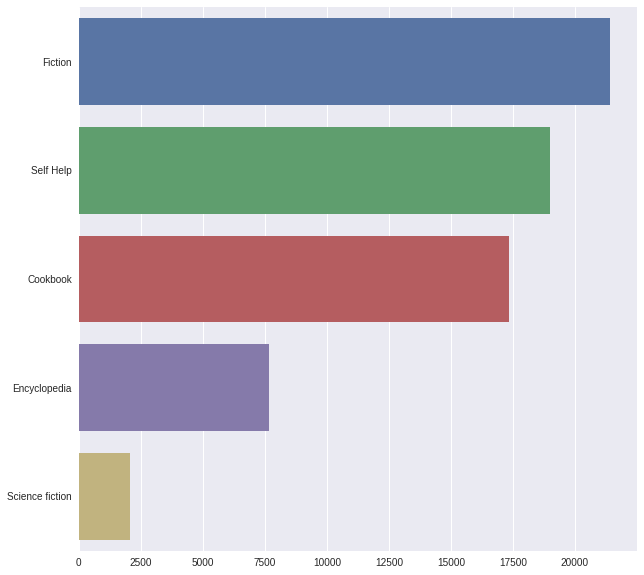

In [70]:
plt.figure(figsize=(10, 10))
category_dict = dict(book.head(5)[['Reviews', 'Genre']].groupby(
    'Genre')['Reviews'].sum())
data_plot = dict(sorted(category_dict.items(),
                 key=lambda kv: kv[1], reverse=True))
keys = list(data_plot.keys())
vals = [int(data_plot[k]) for k in keys]
sns.barplot(y=keys, x=vals)
plt.show()

## แสดงข้อมูล Top 20 ของผู้แต่งหนังสือที่ออกหนังสือมากที่สุด

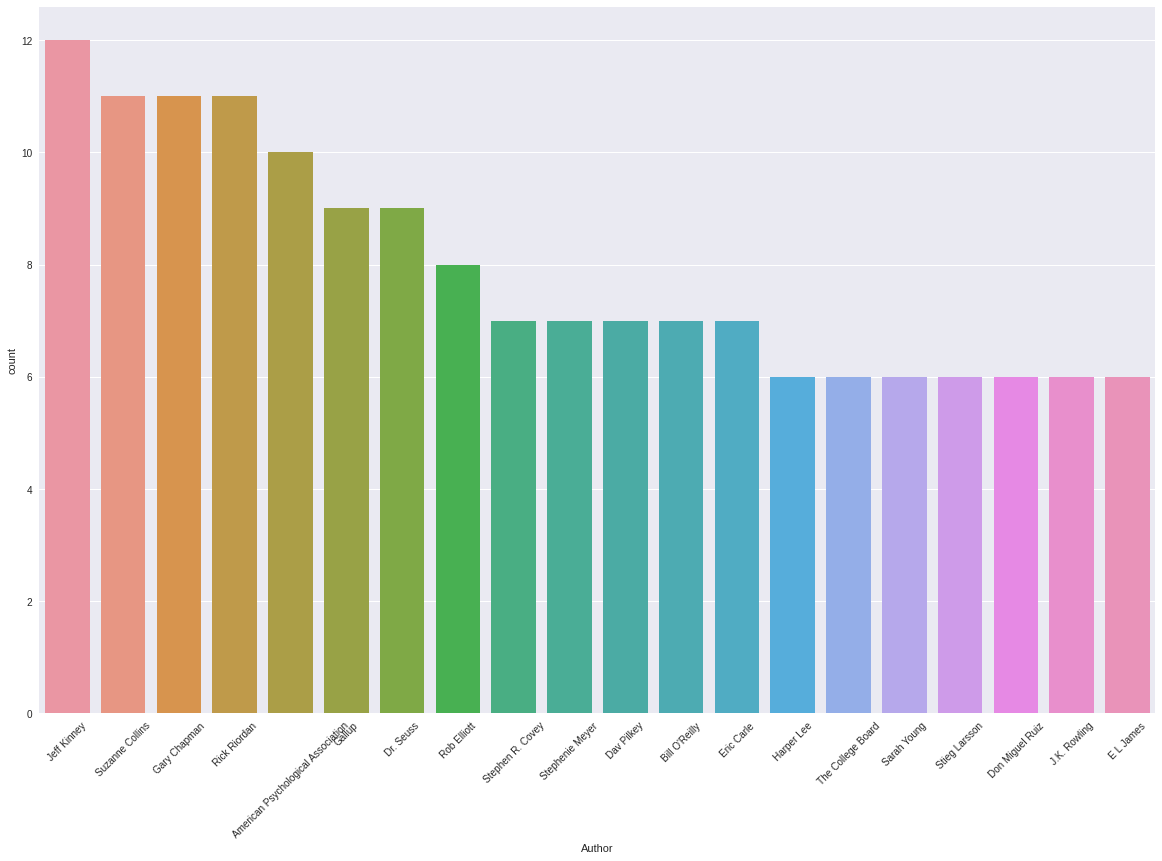

In [71]:
plt.figure(figsize=(20, 13))
sns.countplot(book.Author.dropna(), order = book.Author.value_counts().iloc[:20].index)
plt.xticks(rotation=45);

## แสดงจำนวนหนังสือที่วางขายในแต่ละปี

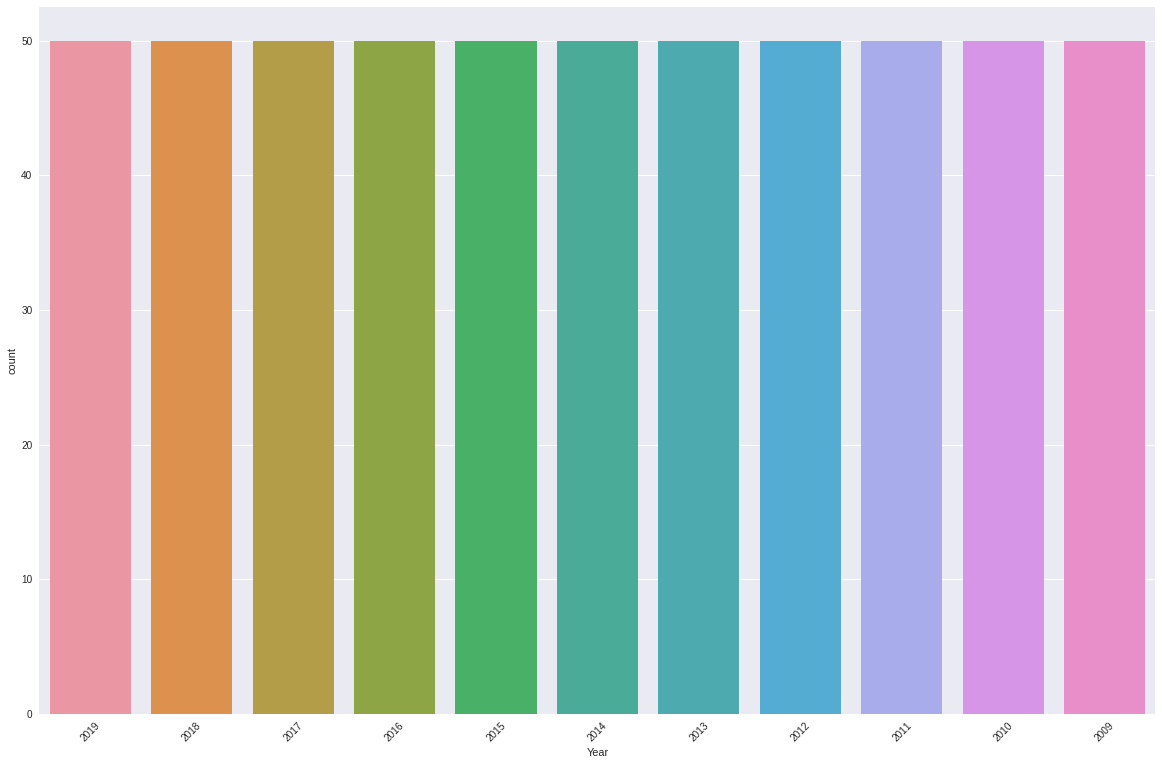

In [72]:
plt.figure(figsize=(20, 13))
sns.countplot(book.Year.dropna(), order = book.Year.value_counts().iloc[:20].index)
plt.xticks(rotation=45);


##หนังสือที่มียอดรีวิวสูงสุด

Text(0, 0.5, 'Review')

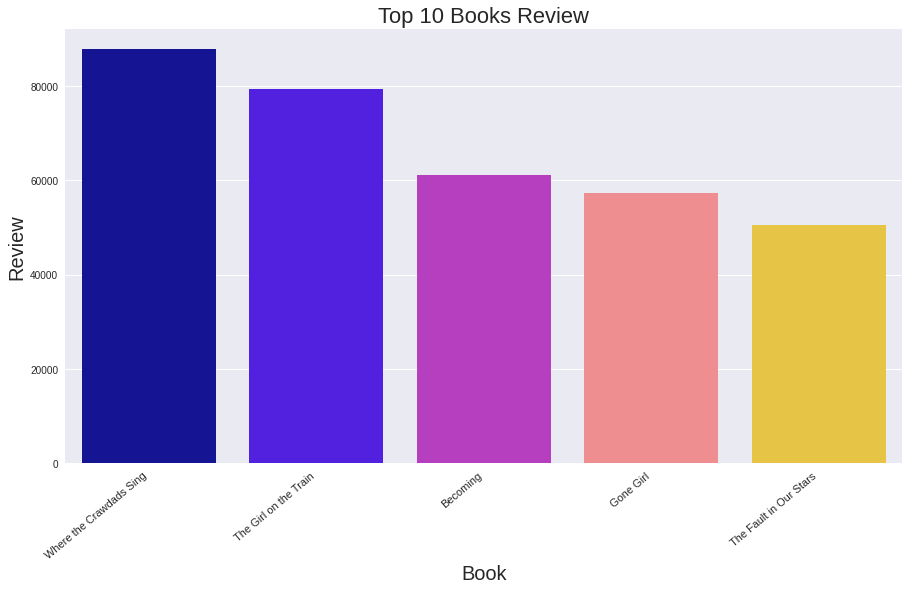

In [73]:
top10=book[['Name', 'Reviews']].sort_values(by = 'Reviews',ascending = False).head(10)
plt.figure(figsize=(15,8))
ax=sns.barplot(x="Name", y="Reviews", data=top10, palette="gnuplot2")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11, rotation=40, ha="right")
ax.set_title('Top 10 Books Review',fontsize = 22)
ax.set_xlabel('Book',fontsize = 20) 
ax.set_ylabel('Review', fontsize = 20)

# **Feature Engineering**

เราจะทำ Book Recommendation จึงใช้ Algorithm TfidfVectorizer และ CountVectorizer มาช่วยแบ่งคำ

In [74]:
tfidf_vectorizer = TfidfVectorizer(lowercase=True, stop_words='english')
count_vectorizer = CountVectorizer(lowercase=True, stop_words='english')

In [75]:
tf_idf_matrix = tfidf_vectorizer.fit_transform(book['Name'])

สร้างข้อมูลที่หนังสือที่ใกล้เคียงกัน โดยใช้ Name Author Genre

In [76]:
mix_data = book['Name']+ "|" + book['Author'] + "|" + book['Genre']
#mix_data = book['Name'] + "|" + book['Author'] + "|" + book['Year'].astype(str) + "|" + book['Genre']
mix_data.sample(5)

8      A Higher Loyalty: Truth, Lies, and Leadership|...
13     A Wrinkle in Time (Time Quintet)|Madeleine L'E...
467            The Sun and Her Flowers|Rupi Kaur|Romance
197    Killing Kennedy: The End of Camelot|Bill O'Rei...
298    Shred: The Revolutionary Diet: 6 Weeks 4 Inche...
dtype: object

สร้างตัว Matrix เพื่อหาหนังสือที่มีความคล้ายคลึงกัน Linear Kernel + Count Vectorizer

In [77]:
book_matrix = count_vectorizer.fit_transform(mix_data)
book_linear_count = linear_kernel(book_matrix, book_matrix)

สร้างคลาส recommend

In [78]:
class Recommendations:
    def __init__(self, name: str, amount: int = 10):
        self.name = self.nearest_name(name)
        self.amount = amount

    def nearest_name(self, name: str):
        close = self.get_close_matches(name)
        get_sr = book['Name'][book['Name'].isin([name])]
        if len(get_sr) != 0:
            return get_sr.iloc[0]
        elif close:
            return close[0]
        return None

    def get_close_matches(self, name: str):
        global df
        get_sr2 = book['Name'][book['Name'].apply(
            lambda x: x.lower()).str.contains(name.lower())]
        if len(get_sr2) != 0:
            return get_sr2.tolist()
        return []

    def get_indices(self):
        metadata = book.reset_index()
        indices = pd.Series(metadata.index, index=metadata['Name'])
        if not self.name:
            return None
        return indices[self.name]

    def get_recommendations(self, cosine_sim=book_linear_count):
        indice = self.get_indices()
        if not indice:
            return 'No book name was near'
        sim_scores = list(enumerate(cosine_sim[indice]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        sim_scores = sim_scores[0:self.amount + 1]
        _indices = [i[0] for i in sim_scores]

        
        
        recs = book[['Name', 'Author', 'Year', 'Genre']].iloc[_indices]
        recs['match_score'] = [i[1] for i in sim_scores]
        recs['match_score'] = recs['match_score'].apply(lambda x: round(x, 4))
        recs = recs.loc[recs.Name != self.name]        
        return recs.loc[recs.match_score > 0, ['Name', 'Author', 'Year', 'Genre', 'match_score']]
        

    def get_detail(self):
        return book.loc[book['Name'] == self.name, ['Name', 'Author', 'Year', 'Genre']]

ลองทดสอบหาข้อมูล

In [79]:
recommend = Recommendations('Harry Potter and the Goblet of Fire')
recommend.get_detail()

,Name,Author,Year,Genre
155,Harry Potter and the Goblet of Fire: The Illus...,J. K. Rowling,2019,Fantasy


In [80]:
time_start = time.time()

recommendation = recommend.get_recommendations()

time_end = time.time()
print(f"Book Recommendation : {round(time_end - time_start, 4)} s")

Book Recommendation : 0.0123 s


ทดสอบค้นหาข้อมูลที่ใกล้เคียงกับคำที่ค้นหา

In [81]:
recommendation

,Name,Author,Year,Genre,match_score
153,Harry Potter and the Chamber of Secrets: The I...,J.K. Rowling,2016,Fantasy,13.0
156,Harry Potter and the Prisoner of Azkaban: The ...,J.K. Rowling,2017,Fantasy,13.0
157,Harry Potter and the Sorcerer's Stone: The Ill...,J.K. Rowling,2016,Fantasy,13.0
154,"Harry Potter and the Cursed Child, Parts 1 & 2...",J.K. Rowling,2016,Fantasy,7.0
102,Fantastic Beasts and Where to Find Them: The O...,J.K. Rowling,2016,Fantasy,6.0
158,Harry Potter Coloring Book,Scholastic,2015,Art book,6.0
159,Harry Potter Paperback Box Set (Books 1-7),J. K. Rowling,2016,Fantasy,6.0
15,Adult Coloring Book Designs: Stress Relief Col...,Adult Coloring Book Designs,2016,Art book,4.0
475,The Unofficial Harry Potter Cookbook: From Cau...,Dinah Bucholz,2019,Cookbook,4.0
16,Adult Coloring Book: Stress Relieving Animal D...,Blue Star Coloring,2015,Art book,2.0


# Modelling

## Benchmark Book Recommend

ทำการเปรียบเทียบข้อมูลโดยใช้



1.   Cosine Similarity กับ TfidfVectorizer
2.   Cosine Similarity กับ CountVectorizer
3.   Linear Kernel กับ TfidfVectorizer
4.   Linear Kernel กับ CountVectorizer



### Cosine Similarity + Tfidf Vectorizer

In [82]:
book_matrix = tfidf_vectorizer.fit_transform(mix_data)
book_cosine_sim = cosine_similarity(book_matrix, book_matrix)

In [83]:
class Recommendations:
    def __init__(self, name: str, amount: int = 10):
        self.name = self.nearest_name(name)
        self.amount = amount

    def nearest_name(self, name: str):
        close = self.get_close_matches(name)
        get_sr = book['Name'][book['Name'].isin([name])]
        if len(get_sr) != 0:
            return get_sr.iloc[0]
        elif close:
            return close[0]
        return None

    def get_close_matches(self, name: str):
        global df
        get_sr2 = book['Name'][book['Name'].apply(
            lambda x: x.lower()).str.contains(name.lower())]
        if len(get_sr2) != 0:
            return get_sr2.tolist()
        return []

    def get_indices(self):
        metadata = book.reset_index()
        indices = pd.Series(metadata.index, index=metadata['Name'])
        if not self.name:
            return None
        return indices[self.name]

    def get_recommendations(self, cosine_sim=book_cosine_sim):
        indice = self.get_indices()
        if not indice:
            return 'No book name was near'
        sim_scores = list(enumerate(cosine_sim[indice]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        sim_scores = sim_scores[0:self.amount + 1]
        _indices = [i[0] for i in sim_scores]

        recs = book[['Name', 'Author', 'Year', 'Genre']].iloc[_indices]
        recs['match_score'] = [i[1] for i in sim_scores]
        recs['match_score'] = recs['match_score'].apply(lambda x: round(x, 4))
        recs = recs.loc[recs.Name != self.name]
        return recs.loc[recs.match_score > 0, ['Name', 'Author', 'Year', 'Genre', 'match_score']]

    def get_detail(self):
        return book.loc[book['Name'] == self.name, ['Name', 'Author', 'Year', 'Genre']]

In [84]:
recommend = Recommendations('Harry Potter')

In [85]:
time_start = time.time()

recommendation = recommend.get_recommendations()

time_end = time.time()
print(f"Book Recommendation : {round(time_end - time_start, 4)} s")

Book Recommendation : 0.0084 s


In [86]:
recommendation

,Name,Author,Year,Genre,match_score
155,Harry Potter and the Goblet of Fire: The Illus...,J. K. Rowling,2019,Fantasy,0.4739
157,Harry Potter and the Sorcerer's Stone: The Ill...,J.K. Rowling,2016,Fantasy,0.4509
153,Harry Potter and the Chamber of Secrets: The I...,J.K. Rowling,2016,Fantasy,0.4457
156,Harry Potter and the Prisoner of Azkaban: The ...,J.K. Rowling,2017,Fantasy,0.4457
159,Harry Potter Paperback Box Set (Books 1-7),J. K. Rowling,2016,Fantasy,0.3748
154,"Harry Potter and the Cursed Child, Parts 1 & 2...",J.K. Rowling,2016,Fantasy,0.2926
158,Harry Potter Coloring Book,Scholastic,2015,Art book,0.2546
475,The Unofficial Harry Potter Cookbook: From Cau...,Dinah Bucholz,2019,Cookbook,0.1359
353,The Casual Vacancy,J.K. Rowling,2012,Comedy,0.1329
181,"In the Garden of Beasts: Love, Terror, and an ...",Eric Larson,2011,Biography,0.1293


### Cosine Similarity + Count Vectorizer

In [87]:
book_matrix = count_vectorizer.fit_transform(mix_data)
book_cosine_count = cosine_similarity(book_matrix, book_matrix)

In [88]:
class Recommendations:
    def __init__(self, name: str, amount: int = 10):
        self.name = self.nearest_name(name)
        self.amount = amount

    def nearest_name(self, name: str):
        close = self.get_close_matches(name)
        get_sr = book['Name'][book['Name'].isin([name])]
        if len(get_sr) != 0:
            return get_sr.iloc[0]
        elif close:
            return close[0]
        return None

    def get_close_matches(self, name: str):
        global df
        get_sr2 = book['Name'][book['Name'].apply(
            lambda x: x.lower()).str.contains(name.lower())]
        if len(get_sr2) != 0:
            return get_sr2.tolist()
        return []

    def get_indices(self):
        metadata = book.reset_index()
        indices = pd.Series(metadata.index, index=metadata['Name'])
        if not self.name:
            return None
        return indices[self.name]

    def get_recommendations(self, cosine_sim=book_cosine_count):
        indice = self.get_indices()
        if not indice:
            return 'No book name was near'
        sim_scores = list(enumerate(cosine_sim[indice]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        sim_scores = sim_scores[0:self.amount + 1]
        _indices = [i[0] for i in sim_scores]

        recs = book[['Name', 'Author', 'Year', 'Genre']].iloc[_indices]
        recs['match_score'] = [i[1] for i in sim_scores]
        recs['match_score'] = recs['match_score'].apply(lambda x: round(x, 4))
        recs = recs.loc[recs.Name != self.name]
        return recs.loc[recs.match_score > 0, ['Name', 'Author', 'Year', 'Genre', 'match_score']]

    def get_detail(self):
        return book.loc[book['Name'] == self.name, ['Name', 'Author', 'Year', 'Genre']]

In [89]:
recommend = Recommendations('Harry Potter')

In [90]:
time_start = time.time()

recommendation = recommend.get_recommendations()

time_end = time.time()
print(f"Book Recommendation : {round(time_end - time_start, 4)} s")

Book Recommendation : 0.0109 s


In [91]:
recommendation

,Name,Author,Year,Genre,match_score
155,Harry Potter and the Goblet of Fire: The Illus...,J. K. Rowling,2019,Fantasy,0.5669
153,Harry Potter and the Chamber of Secrets: The I...,J.K. Rowling,2016,Fantasy,0.5477
156,Harry Potter and the Prisoner of Azkaban: The ...,J.K. Rowling,2017,Fantasy,0.5477
157,Harry Potter and the Sorcerer's Stone: The Ill...,J.K. Rowling,2016,Fantasy,0.5477
159,Harry Potter Paperback Box Set (Books 1-7),J. K. Rowling,2016,Fantasy,0.5000
154,"Harry Potter and the Cursed Child, Parts 1 & 2...",J.K. Rowling,2016,Fantasy,0.4264
158,Harry Potter Coloring Book,Scholastic,2015,Art book,0.2357
353,The Casual Vacancy,J.K. Rowling,2012,Comedy,0.1768
475,The Unofficial Harry Potter Cookbook: From Cau...,Dinah Bucholz,2019,Cookbook,0.1768
96,Eclipse (Twilight),Stephenie Meyer,2009,Fantasy,0.1581


### Linear Kernel + Tfidf Vectorizer

In [92]:
book_matrix = tfidf_vectorizer.fit_transform(mix_data)
book_linear_tfidf = linear_kernel(book_matrix, book_matrix)

In [93]:
class Recommendations:
    def __init__(self, name: str, amount: int = 10):
        self.name = self.nearest_name(name)
        self.amount = amount

    def nearest_name(self, name: str):
        close = self.get_close_matches(name)
        get_sr = book['Name'][book['Name'].isin([name])]
        if len(get_sr) != 0:
            return get_sr.iloc[0]
        elif close:
            return close[0]
        return None

    def get_close_matches(self, name: str):
        global df
        get_sr2 = book['Name'][book['Name'].apply(
            lambda x: x.lower()).str.contains(name.lower())]
        if len(get_sr2) != 0:
            return get_sr2.tolist()
        return []

    def get_indices(self):
        metadata = book.reset_index()
        indices = pd.Series(metadata.index, index=metadata['Name'])
        if not self.name:
            return None
        return indices[self.name]

    def get_recommendations(self, linear_ker=book_linear_tfidf):
        indice = self.get_indices()
        if not indice:
            return 'No book name was near'
        sim_scores = list(enumerate(linear_ker[indice]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        sim_scores = sim_scores[0:self.amount + 1]
        _indices = [i[0] for i in sim_scores]

        recs = book[['Name', 'Author', 'Year', 'Genre']].iloc[_indices]
        recs['match_score'] = [i[1] for i in sim_scores]
        recs['match_score'] = recs['match_score'].apply(lambda x: round(x, 4))
        recs = recs.loc[recs.Name != self.name]
        return recs.loc[recs.match_score > 0, ['Name', 'Author', 'Year', 'Genre', 'match_score']]

    def get_detail(self):
        return book.loc[book['Name'] == self.name, ['Name', 'Author', 'Year', 'Genre']]

In [94]:
recommend = Recommendations('Harry Potter')

In [95]:
time_start = time.time()

recommendation = recommend.get_recommendations()

time_end = time.time()
print(f"Book Recommendation : {round(time_end - time_start, 4)} s")

Book Recommendation : 0.012 s


In [96]:
recommendation

,Name,Author,Year,Genre,match_score
155,Harry Potter and the Goblet of Fire: The Illus...,J. K. Rowling,2019,Fantasy,0.4739
157,Harry Potter and the Sorcerer's Stone: The Ill...,J.K. Rowling,2016,Fantasy,0.4509
153,Harry Potter and the Chamber of Secrets: The I...,J.K. Rowling,2016,Fantasy,0.4457
156,Harry Potter and the Prisoner of Azkaban: The ...,J.K. Rowling,2017,Fantasy,0.4457
159,Harry Potter Paperback Box Set (Books 1-7),J. K. Rowling,2016,Fantasy,0.3748
154,"Harry Potter and the Cursed Child, Parts 1 & 2...",J.K. Rowling,2016,Fantasy,0.2926
158,Harry Potter Coloring Book,Scholastic,2015,Art book,0.2546
475,The Unofficial Harry Potter Cookbook: From Cau...,Dinah Bucholz,2019,Cookbook,0.1359
353,The Casual Vacancy,J.K. Rowling,2012,Comedy,0.1329
181,"In the Garden of Beasts: Love, Terror, and an ...",Eric Larson,2011,Biography,0.1293


### Linear Kernel + Count Vectorizer

In [97]:
book_matrix = count_vectorizer.fit_transform(mix_data)
book_linear_count = linear_kernel(book_matrix, book_matrix)

In [98]:
class Recommendations:
    def __init__(self, name: str, amount: int = 10):
        self.name = self.nearest_name(name)
        self.amount = amount

    def nearest_name(self, name: str):
        close = self.get_close_matches(name)
        get_sr = book['Name'][book['Name'].isin([name])]
        if len(get_sr) != 0:
            return get_sr.iloc[0]
        elif close:
            return close[0]
        return None

    def get_close_matches(self, name: str):
        global df
        get_sr2 = book['Name'][book['Name'].apply(
            lambda x: x.lower()).str.contains(name.lower())]
        if len(get_sr2) != 0:
            return get_sr2.tolist()
        return []

    def get_indices(self):
        metadata = book.reset_index()
        indices = pd.Series(metadata.index, index=metadata['Name'])
        if not self.name:
            return None
        return indices[self.name]

    def get_recommendations(self, linear_ker=book_linear_count):
        indice = self.get_indices()
        if not indice:
            return 'No book name was near'
        sim_scores = list(enumerate(linear_ker[indice]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        sim_scores = sim_scores[0:self.amount + 1]
        _indices = [i[0] for i in sim_scores]

        
        recs = book[['Name', 'Author', 'Year', 'Genre']].iloc[_indices]
        recs['match_score'] = [i[1] for i in sim_scores]
        recs['match_score'] = recs['match_score'].apply(lambda x: round(x, 4))
        recs = recs.loc[recs.Name != self.name]
        return recs.loc[recs.match_score > 0, ['Name', 'Author', 'Year', 'Genre', 'match_score']]

    def get_detail(self):
        return book.loc[book['Name'] == self.name, ['Name', 'Author', 'Year', 'Genre']]

In [99]:
recommend = Recommendations('Harry Potter')

In [100]:
time_start = time.time()

recommendation = recommend.get_recommendations()

time_end = time.time()
print(f"Book Recommendation : {round(time_end - time_start, 4)} s")

Book Recommendation : 0.0104 s


In [101]:
recommendation

,Name,Author,Year,Genre,match_score
153,Harry Potter and the Chamber of Secrets: The I...,J.K. Rowling,2016,Fantasy,6.0
155,Harry Potter and the Goblet of Fire: The Illus...,J. K. Rowling,2019,Fantasy,6.0
156,Harry Potter and the Prisoner of Azkaban: The ...,J.K. Rowling,2017,Fantasy,6.0
157,Harry Potter and the Sorcerer's Stone: The Ill...,J.K. Rowling,2016,Fantasy,6.0
154,"Harry Potter and the Cursed Child, Parts 1 & 2...",J.K. Rowling,2016,Fantasy,4.0
159,Harry Potter Paperback Box Set (Books 1-7),J. K. Rowling,2016,Fantasy,4.0
158,Harry Potter Coloring Book,Scholastic,2015,Art book,2.0
475,The Unofficial Harry Potter Cookbook: From Cau...,Dinah Bucholz,2019,Cookbook,2.0
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,2011,Fantasy,1.0
6,A Game of Thrones / A Clash of Kings / A Storm...,George R. R. Martin,2014,Fantasy,1.0


###สรุป

Cosine + Tfidf

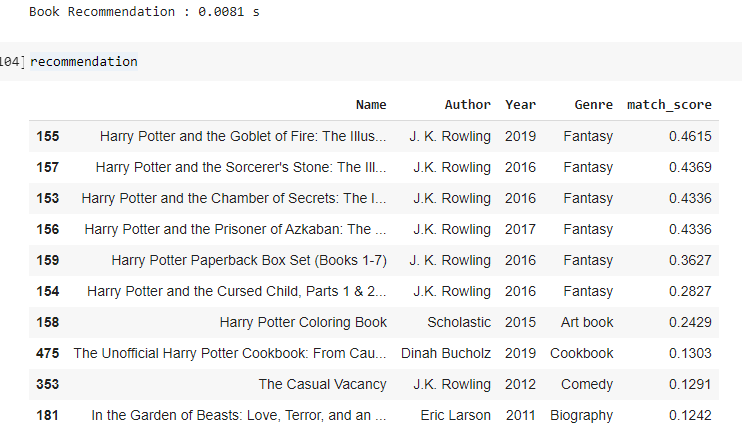

Cosine + Count

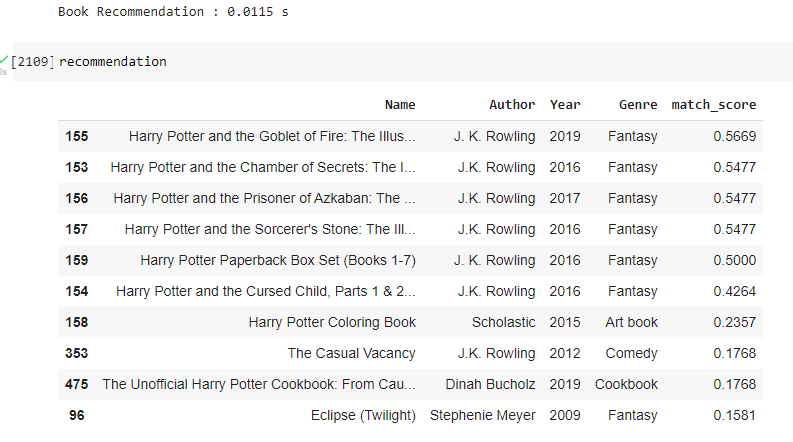

Linear + Tfidf

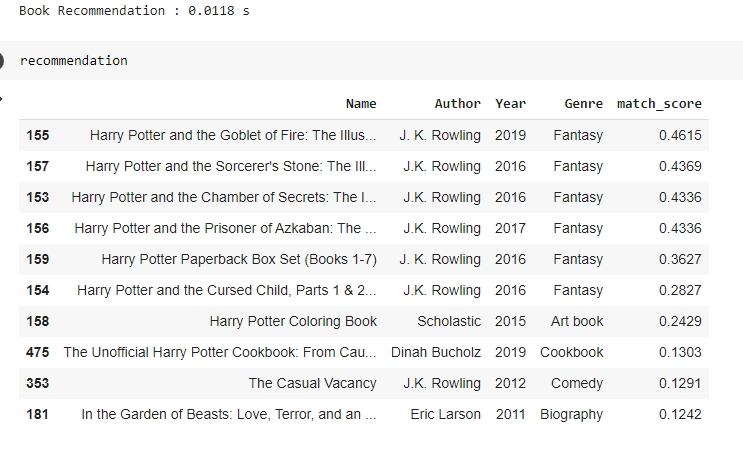

Linear + Count

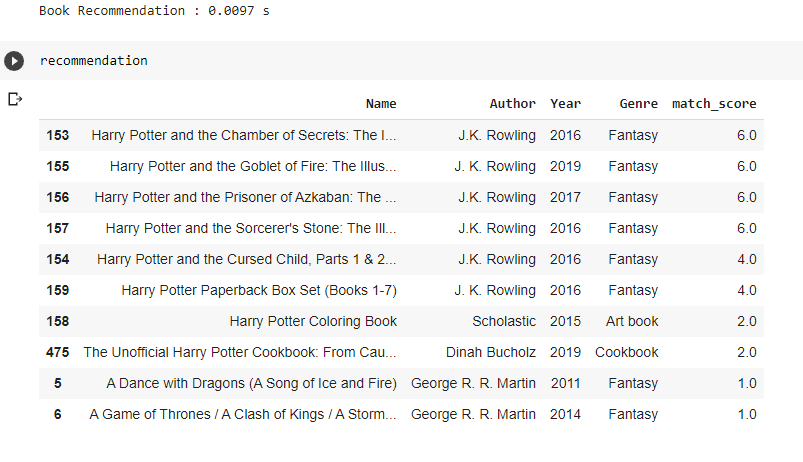

####ผลลัพท์

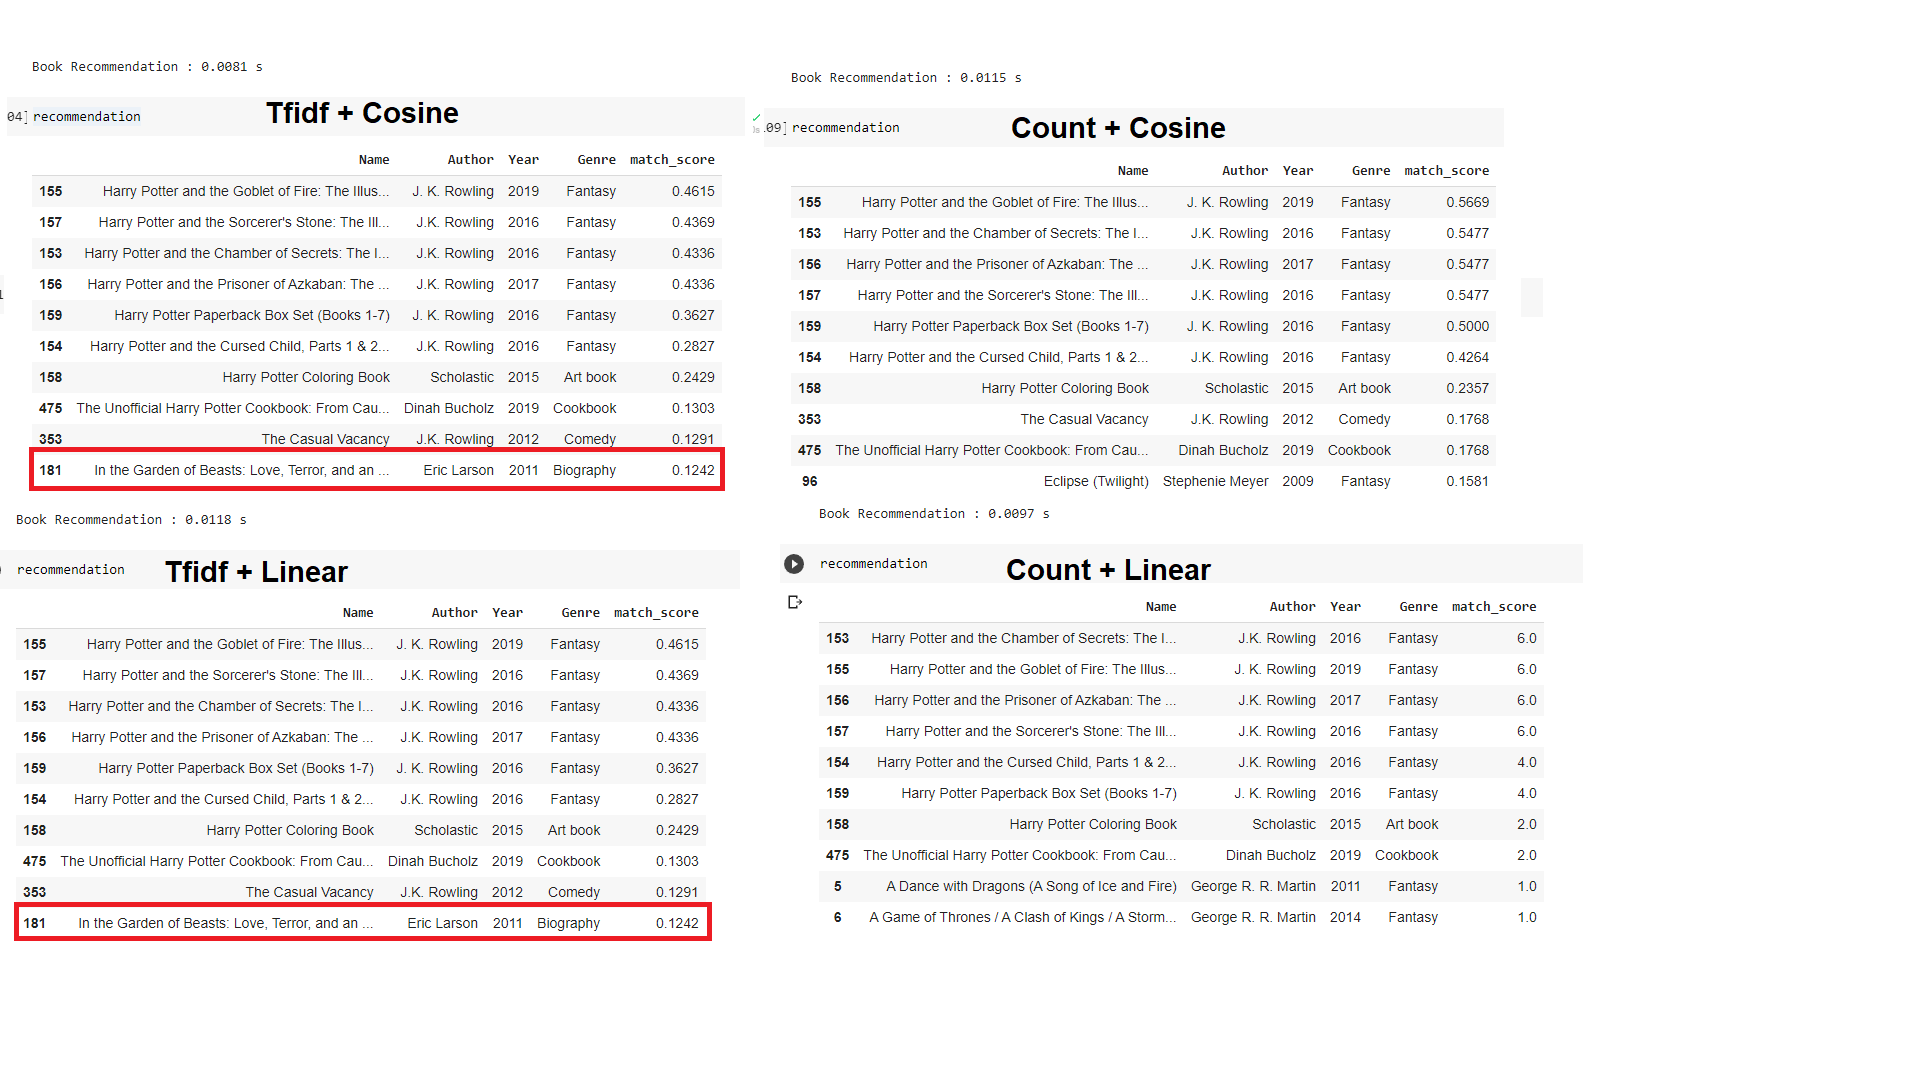

จากข้อมูลสรุปได้ว่า Count Vectorizer ข้อมูลใกล้เคียงกว่า และ Linear Kernel ไวกว่า จึงใช้ Count Vectorizer + Linear Kernel

# Pipeline

Pipeline ก็คือการรวมการทำงานจากด้านบนที่ทำก่อนหน้ามารวมไว้
แล้วนำไปเข้า Model ที่เลือกในการ Recommend หนังสือ

In [102]:
class PipeLine():

    def data_cleaning(self, data):
        data.rename(columns={'User Rating': 'User_rating'}, inplace=True)
        #data.drop_duplicates(subset='Name', inplace=True)
        return data
    
    def tfidf_fit_transform(self,data):
        tfidf_fit_transform = TfidfVectorizer(lowercase=True, stop_words = 'english')
        tfidf_fit_matrix = tfidf_fit_transform.fit_transform(data['Name'] + "|" + data['Author'] + "|" + data['Year'].astype(str) + "|" + data['Genre'])
        return tfidf_fit_matrix
    
    def execution(self, data):
      df = data.copy()
      df = self.data_cleaning(df)
      return self.tfidf_fit_transform(df)

In [103]:
pipeline = PipeLine()
book_pipe_matrix = pipeline.execution(book_data)
linear_ker = linear_kernel(book_pipe_matrix, book_pipe_matrix)
linear_ker

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.02342256, 0.02342256,
        0.02342256],
       [0.        , 0.        , 1.        , ..., 0.05382963, 0.09053908,
        0.05382963],
       ...,
       [0.        , 0.02342256, 0.05382963, ..., 1.        , 0.96395839,
        0.96395839],
       [0.        , 0.02342256, 0.09053908, ..., 0.96395839, 1.        ,
        0.96395839],
       [0.        , 0.02342256, 0.05382963, ..., 0.96395839, 0.96395839,
        1.        ]])

In [104]:
class Recommendations:
    def __init__(self, name: str, amount: int = 10):
        self.name = self.nearest_name(name)
        self.amount = amount

    def nearest_name(self, name: str):
        close = self.get_close_matches(name)
        get_sr = book['Name'][book['Name'].isin([name])]
        if len(get_sr) != 0:
            return get_sr.iloc[0]
        elif close:
            return close[0]
        return None

    def get_close_matches(self, name: str):
        global df
        get_sr2 = book['Name'][book['Name'].apply(
            lambda x: x.lower()).str.contains(name.lower())]
        if len(get_sr2) != 0:
            return get_sr2.tolist()
        return []

    def get_indices(self):
        metadata = book.reset_index()
        indices = pd.Series(metadata.index, index=metadata['Name'])
        if not self.name:
            return None
        return indices[self.name]

    def get_recommendations(self, linear_ker=book_linear_count):
        indice = self.get_indices()
        if not indice:
            return 'No book name was near'
        sim_scores = list(enumerate(linear_ker[indice]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        sim_scores = sim_scores[0:self.amount + 1]
        _indices = [i[0] for i in sim_scores]

        recs = book[['Name', 'Author', 'Genre']].iloc[_indices]
        #recs = book[['Name', 'Author', 'Year', 'Genre']].iloc[_indices]
        recs['match_score'] = [i[1] for i in sim_scores]
        recs['match_score'] = recs['match_score'].apply(lambda x: round(x, 4))
        recs = recs.loc[recs.Name != self.name]
        return recs.loc[recs.match_score > 0, ['Name', 'Author', 'Genre', 'match_score']]
        #return recs.loc[recs.match_score > 0, ['Name', 'Author', 'Year', 'Genre', 'match_score']]

    def get_detail(self):
        return book.loc[book['Name'] == self.name, ['Name', 'Author', 'Genre']]
        #return book.loc[book['Name'] == self.name, ['Name', 'Author', 'Year', 'Genre']]


In [105]:
def prepare_recommned(name):
    return print('pass'), Recommendations(name).get_recommendations()

# Deployment

In [106]:
iface = gr.Interface(prepare_recommned,inputs=[gr.inputs.Textbox(label='Book Recommendation', 
                default="Harry Potter")],outputs=[gr.outputs.Dataframe(label='Harry Potter and the Goblet of Fire: The Illustrated Edition'),gr.outputs.Dataframe(label='Book Recommendation')])
iface.launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://38546.gradio.app

This share link will expire in 72 hours. To get longer links, send an email to: support@gradio.app


(<Flask 'gradio.networking'>,
 'http://127.0.0.1:7861/',
 'https://38546.gradio.app')

# References

*   https://colab.research.google.com/drive/18ywkW4s7OPprJGvjCTLPjA3ziYueUMUz?
*   https://www.kaggle.com/ivannatarov/amazon-s-books-eda-plotly-hypothesis-test
*   https://www.kaggle.com/arashnic/book-recommendation-dataset
*   https://www.kaggle.com/sootersaalu/amazon-top-50-bestselling-books-2009-2019
*   https://github.com/MacClay/CS434/blob/main/s434_finalexam__อีหยังวะ_ห้วย_!_.ipynb
*   https://medium.com/@phupipat.jimj/work-reflection-cs434-f192633235b6



usp=sharing

# Members

*   1620707776 ภูพิพัฒน์ จิมจวน (โอเว่น) - **Design**
*   1620707867 สรวิชญ์ วินิจกุล (เบ็ค) - **Developer** 
*   1640707285 พศวีร์ ประจวบอารีย์ (ปราณ) - **Visualizer**